# Calculating the uniqueness and average age of my children
About six months ago I took a deep dive into becoming a data scientist.  Since then, I have been wanting to start documenting my journey, but it is a little intimidating.  I don't really know where to start.  After all, I am still new to all of this, what could I possibly have to write about?  Well, I'm just going to start with a playful analysis of my kids' names using the [Social Security Administration's baby names dataset](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data).  After all, data science is rooted in data exploration and analysis.

I have created [a GitHub repository](https://github.com/TheeChris/babynames) (since using Git is a part of this learning journey) where I will upload all of the datasets and code that I used for this analysis, so you can explore and share your own analyses.  Well, let's get started by retrieving [the datasets](https://github.com/TheeChris/babynames/tree/master/data). Unfortunately, the baby names dataset is divided into separate comma-delimited text files for each year, but this just gives me a chance to practice automating the process of importing and concatenating CSV files.

First, let's import some libraries.

In [2]:
# Load Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Next, I am going to create a list of years and use that list to concatenate all of the CSV files into one data frame.

In [3]:
# Create a list of years from 1880 to 2016
years = [i for i in range(1880, 2017)]
print(years)

[1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [4]:
# Initialize an empty list to become the babynames dataframe
babynames = []

# Generate the babyname csv file names to be imported
for each in years:
    file_name = "datasets/babynames/yob%s.txt" % each

    columns = ['Name', 'Sex', 'Count']
    
    # read each csv file into a dataframe
    babyname_df = pd.read_csv(file_name, sep=',', header=0, names=columns)
    
    # insert a column for the year
    babyname_df.insert(0, 'Year', each)
    
    # append each year's dataframe to the babynames list
    babynames.append(babyname_df)

# convert the babynames list into a dataframe
babynames = pd.concat(babynames, axis=0)
babynames.sample(10)

,Year,Name,Sex,Count
8749,1928,Samul,M,8
7645,1918,Seaborn,M,16
23961,2010,Hiro,M,24
7463,1917,Matias,M,14
21471,1997,Basel,M,11
7626,1976,Junetta,F,7
532,1914,Gene,F,109
26099,2000,Duc,M,7
15240,1994,Saleen,F,5
22779,1996,Markeem,M,8


## Determining the Questions
This is a very simple, clean dataset, so we don't need to worry about cleaning it up. However, I needed to figure out what kind of information to look at. I did not want to simply look at the most popular names ([the SSA already does that pretty well](https://www.ssa.gov/oact/babynames/)). Instead, I was curious about the fact that before my daughter,  I only ever knew of two women named Maya: Angelou and Rudolph. We named our daughter after the former, believing it to be a beautiful and seemingly unique name, and Maya Angelou was a great poet and activist who had died shortly before our daughter's birth.  (Side note: it also allowed me to tie in my love for astronomy: the "oldest sister" in the Pleiades star cluster is named Maia). However, when we moved to California a couple of years ago, we started meeting several girls between the ages of 2 to 12 named Maya.  Is the name more popular than we realized?  Or is this a case of frequency illusion?  With regards to our son, Henry, we assumed that the average age of Henry's has to be around 80. Let's see what we can find out.

## The Popularity of Maya
I started by creating a line of code that defined a new database with only my daughter's name. As I started writing the same line of code for my son's name, I realized that I could easily create a function that takes a list of names. That way I could pull data on multiple names in just one line of code.  I did the same thing for plotting the data. I used these functions to get data on me, my wife, and our parents, but we'll focus on my kids' names for the sake of space.

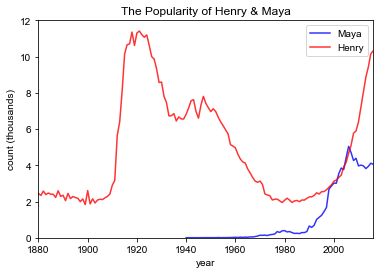

In [5]:
def get_info(name, sex):
    '''
    This function takes a name and sex and generates a dataframe 
    with that specific information from the babynames dataframe
    '''
    name_data = babynames[(babynames['Name'] == name) & (babynames['Sex'] == sex)]
    return name_data

def plot_trends(names, sex, color, scale='linear', title=None, style='seaborn-white'):
    '''
    This function takes a name and sex and creates a plot showing
    the number of births for that name from 1880 to 2016
    '''
    for idx in range(len(names)):
        info = get_info(names[idx], sex[idx])
        axes = plt.plot(info['Year'], info['Count']/1000, label=names[idx], alpha=0.8, c=color[idx])
        plt.title(title)
    plt.legend(loc='best')
    plt.xlabel('year')
    plt.ylabel('count (thousands)')
    plt.yscale(scale)
    plt.style.use(style)
    plt.axis([1880,2016,0,12])
    return axes

# Create dataframes for Maya and Henry
maya = get_info('Maya','F')
henry = get_info('Henry', 'M')

# Plot trends for Maya and Henry
kids = ['Maya','Henry']
plot_trends(kids, ['F','M'], ['blue', 'red'], title='The Popularity of Henry & Maya')

Regarding the name Maya, the first thing that stands out is that it doesn't appear in the SSA data until 1940. The name is found in lots of cultures, so I'm curious if the introduction of the name into the US was the result of an influx of World War II refugees.  Unfortunately, that will remain speculation with this current data set, but maybe something to look into in the future.  There has definitely been a steady increase in girls named Maya since the mid-1980s, with a peak just before my daughter was born. This peak, however, is nothing compared to the numbers we are getting from the name Henry. Seems like Henry is making a very strong comeback.  Looks like we are going to have a lot of Henrys over the age of 75 and under the age of 10.

It definitely seems like Maya is a relatively unique name.  To get a better idea of how unique, let's plot Maya against the top 5 most popular girl's name for 2014.

In [98]:
# Top 5 female names in 2014
top5_2014 = babynames[(babynames['Sex'] == 'F') & (babynames['Year'] == 2014)]
top5_2014 = np.array(top5_2014.iloc[:5,1]).tolist()
top5_2014

['Olivia', 'Sophia', 'Isabella', 'Ava', 'Mia']

Now I will create data frames for each of these names so that we can pull the birth count numbers over time. Then we can plot the data compared to the name Maya.  Interestingly enough, if you plot all of the birth counts of these names over the years, you will see that they were all relatively unpopular until the mid-80's and 90's when they all began to climb rapidly. For this reason, I started the data off at 1980 so that we can get a better look.

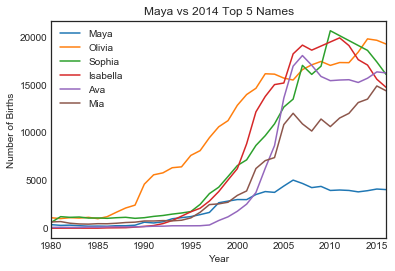

In [100]:
# Create dataframes for each name
olivia = get_info('Olivia','F')
sophia = get_info('Sophia','F')
isabella = get_info('Isabella','F')
ava = get_info('Ava','F')
mia = get_info('Mia','F')

# Plot number of Mayas against Top 5 
_top = plt.plot(maya['Year'], maya['Count'])
_top = plt.plot(olivia['Year'], olivia['Count'])
_top = plt.plot(sophia['Year'], sophia['Count'])
_top = plt.plot(isabella['Year'], isabella['Count'])
_top = plt.plot(ava['Year'], ava['Count'])
_top = plt.plot(mia['Year'], mia['Count'])
_top = plt.legend(['Maya','Olivia', 'Sophia', 'Isabella', 'Ava', 'Mia'])
_top = plt.xlabel('Year')
_top = plt.ylabel('Number of Births')
_top = plt.title('Maya vs 2014 Top 5 Names')
_top = plt.xlim(1980,2016)

plt.show()

We can see from the plot that the name Maya was only about 1/5th as popular as the name Olivia.  However, it does not give us a very robust idea of the name popularity. We could really dive in and start calculating the number of Maya's projected to be living between the ages of 2 and 14, and from that determine the percentage of 2- to 14-year-olds named Maya, but let's just look at one last calculation to get a better idea of the popularity of the names in 2014.

In [102]:
# Add columns to dataframe: 'Total Births by Year' and 'Total by Year and Sex'
babynames['Total by Year and Sex'] = 0
babynames['Total Births by Year'] = 0

for year in years:
    babynames.loc[babynames.Year == year, 'Total Births by Year'] = babynames[(babynames.Year == year)]['Count'].sum()  
    babynames.loc[(babynames.Year == year) &  (babynames.Sex == 'F'), 'Total by Year and Sex'] = babynames[(babynames.Year == year) & (babynames.Sex == 'F')]['Count'].sum()
    babynames.loc[(babynames.Year == year) & (babynames.Sex == 'M'), 'Total by Year and Sex'] = babynames[(babynames.Year == year) & (babynames.Sex == 'M')]['Count'].sum()
    
# Add columns to dataframe: 'Percent of Total' and 'Percent by Sex'
babynames['Pct of Total'] = (babynames['Count'] / babynames['Total Births by Year']) * 100
babynames['Pct by Sex'] = (babynames['Count'] / babynames['Total by Year and Sex']) * 100
babynames.sample(5)

,Year,Name,Sex,Count,Total Births by Year,Total by Year and Sex,Pct of Total,Pct by Sex
813,2012,Nathaly,F,328,3626149,1734055,0.009045,0.018915
19652,1987,Herbie,M,6,3548098,1865987,0.000169,0.000322
30591,2008,Dionel,M,7,3906680,2037309,0.000179,0.000344
1929,2015,Bennett,F,104,3663334,1756123,0.002839,0.005922
206,1890,Adele,F,133,289323,178298,0.045969,0.074594


In [103]:
# Combine 2014 names into one dataframe for easier reading
top5_2014_merged = olivia.append([sophia, isabella, ava, mia, maya])

print(top5_2014_merged[top5_2014_merged['Year'] == 2014])

    Year      Name Sex  Count  Total Births by Year  Total by Year and Sex  \
0   2014    Olivia   F  19784               3672018                1758584   
1   2014    Sophia   F  18583               3672018                1758584   
2   2014  Isabella   F  17054               3672018                1758584   
3   2014       Ava   F  15680               3672018                1758584   
4   2014       Mia   F  13501               3672018                1758584   
72  2014      Maya   F   3942               3672018                1758584   

    Pct of Total  Pct by Sex  
0       0.538777    1.124996  
1       0.506071    1.056702  
2       0.464431    0.969757  
3       0.427013    0.891626  
4       0.367672    0.767720  
72      0.107352    0.224158  


Despite being ranked the 73rd most popular name in 2014 and accounting for only 0.22% of the babies born, Maya was not much more unique than the top five names, which range from 1.12% to 0.77% of the babies born that year. So it can be argued that Maya is a unique name, but so are all of the other names.  We will have to chalk this one up to the frequency illusion bias. A better question might be: is it more unique to give your daughter a name that doesn't end in 'a'?

## The Age of Henry
Ok, that took a little longer than I planned, but I asked another question ('What is the average age of Henry?'), so I have a little more work to do. First, we need to pull in data from the [SSA's Actuarial Life Tables](https://www.ssa.gov/oact/STATS/table4c6.html).  And then I'm going to merge the life table data with Henry's data frame and calculate the estimated number of living Henry's for each year.  To get a visual of the number of Henry's by age, I made this plot, too.

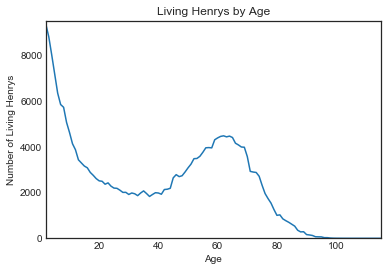

In [104]:
# Create a dataframe from male actuarial data
life_table_male = pd.read_csv('datasets/babynames/LifeTables_M_2017.csv', skiprows=4)

# Merge Henry dataframe with relevant actuarial data
henry_alive = henry.merge(lifetables_male_2016, on='Year')

# Create a column of the estimated number of living Henrys from each year
henry_alive['n_alive'] = henry_alive['l(x)']*henry_alive['Count']/(10**5)

# Generate a plot of the number of living Henrys at each age
_h = plt.plot(henry_alive.x, henry_alive.n_alive)
_h = plt.title('Living Henrys by Age')
_h = plt.xlabel('Age')
_h = plt.ylabel('Number of Living Henrys')
_h = plt.axis([2,115,0,9500])
plt.show()

We can see that although there is a large grouping of Henrys aged 50-70, they are dwarfed by the number of Henrys that have been born in the past 10 years.  This should have a noticeable effect by dragging the average under the age of 50.  Let's calculate and see:

In [105]:
# Create a column of the product of age and number alive
henry_alive['rel_age'] = henry_alive.x * henry_alive.n_alive

# From weighted age, calculate the average age
avg_age = henry_alive.rel_age.sum() / henry_alive.n_alive.sum()
avg_age

38.16698456491083

And the average age of Henry is... 38! I guess Henrys could say they are getting younger every day (statistically speaking, of course).

## Conclusion
Well, it looks like I was wrong on both accounts: there are not an inordinate number of Mayas being born and the average age of Henry is not even close to 80.  At least I can say that I learned a little something in the process.  Actually, I learned a lot and not just about my kids' names.  In order to create some of this code I had to look up a few new tricks.  I will be back again soon. I am working on a few other projects, but between studying, work, and family, I am not going to make any promises about timelines. 



## Bonus Material
I fell into a bit of a rabbit hole while looking at the babynames and actuarial data.  Here are some additional things that I did with the dataset:

In [6]:
# Get the count for the year the name Maya peaked and the year she was born
most_mayas = maya[maya.Count == maya.Count.max()]
maya_2014 = maya[maya.Year == 2014]

# Get the count for the year the name Henry peaked and the year he was born (-ish)
most_henrys = henry[henry.Count == henry.Count.max()]
henry_2016 = henry[henry.Year == 2016]

print(most_mayas)
print(maya_2014)
print(most_henrys)
print(henry_2016)

    Year  Name Sex  Count
55  2006  Maya   F   5046
    Year  Name Sex  Count
72  2014  Maya   F   3942
      Year   Name Sex  Count
5885  1921  Henry   M  11413
       Year   Name Sex  Count
18777  2016  Henry   M  10323


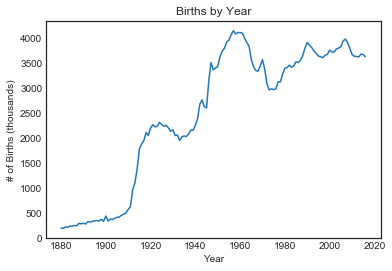

In [18]:
# Plot number of births by year
_ = plt.plot(babynames['Year'], babynames['Total Births by Year']/1000)
_ = plt.title('Births by Year')
_ = plt.xlabel('Year')
_ = plt.ylabel('# of Births (thousands)')
plt.show()

In [20]:
# import modules
import fuzzywuzzy
from fuzzywuzzy import process

# See names that are similar to Maya to see if we need to update calculations
close = fuzzywuzzy.process.extract("Maya", babynames['Name'].unique(), limit=100, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
close

# Some possible additions to improve calculations: Maiya, Mayah, Mayia, Mahya, Maaya, Mya, 

[('Maya', 100),
 ('Marya', 89),
 ('Manya', 89),
 ('Mayda', 89),
 ('Mayra', 89),
 ('Mayna', 89),
 ('Mayla', 89),
 ('Amaya', 89),
 ('Maiya', 89),
 ('Maysa', 89),
 ('Miaya', 89),
 ('Mayah', 89),
 ('Mayan', 89),
 ('Mayia', 89),
 ('Malya', 89),
 ('Makya', 89),
 ('Emaya', 89),
 ('Imaya', 89),
 ('Jmaya', 89),
 ('Umaya', 89),
 ('Omaya', 89),
 ('Dmaya', 89),
 ('Mayar', 89),
 ('Mahya', 89),
 ('Maaya', 89),
 ('Mayka', 89),
 ('Tmaya', 89),
 ('Kmaya', 89),
 ('Smaya', 89),
 ('Zmaya', 89),
 ('Mayha', 89),
 ('Maeya', 89),
 ('Mayva', 89),
 ('May', 86),
 ('Mya', 86),
 ('Aya', 86),
 ('Mayola', 80),
 ('Maryan', 80),
 ('Mayona', 80),
 ('Maytha', 80),
 ('Mayoma', 80),
 ('Maryam', 80),
 ('Maurya', 80),
 ('Maryla', 80),
 ('Mayela', 80),
 ('Mayann', 80),
 ('Omayra', 80),
 ('Sumaya', 80),
 ('Mariya', 80),
 ('Marysa', 80),
 ('Tamaya', 80),
 ('Maryah', 80),
 ('Maygan', 80),
 ('Malaya', 80),
 ('Maraya', 80),
 ('Mataya', 80),
 ('Makeya', 80),
 ('Lamaya', 80),
 ('Samaya', 80),
 ('Matoya', 80),
 ('Maytal', 80),
 ('Ma

In [106]:
# Generate data for the name that accounted for the highest percentage of births by sex
the_most = babynames[babynames['Pct by Sex'] == babynames['Pct by Sex'].max()]

print(the_most)

     Year  Name Sex  Count  Total Births by Year  Total by Year and Sex  \
941  1880  John   M   9655                194418                 110491   

     Pct of Total  Pct by Sex  
941      4.966104    8.738268  


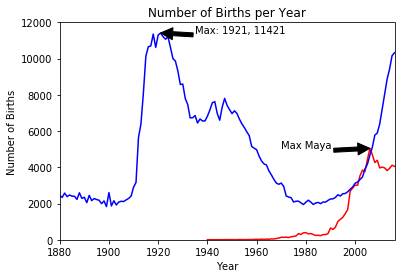

In [86]:
# Generate a different plot that highlights the peak years for Henry and Maya
plt.plot(maya['Year'], maya['Count'], color='red') 
plt.plot(henry['Year'], henry['Count'], color='blue')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Number of Births')

# Set the x-axis range
plt.xlim([1880,2016])

# Set the y-axis range
plt.ylim([0, 12000])

# Add a title and display the plot
plt.title('Number of Births')

#plt.subplot(2,1,2)
#plot_trends(kids, ['F','M'], ['red', 'blue'])
#plt.title('Birth count per year')
#plt.tight_layout()
plt.show()

In [64]:
def year_total(year, sex):
    '''
    This function with generate a total number of births
    for the given year and sex
    '''
    total_by_sex = babynames[(babynames.Year == year) & (babynames.Sex == sex)].sum()
    return total_by_sex

# Generate total female births for 2014
total_2014 = year_total(2014, 'F')

In [65]:
# create dataframe of info for Maya in 2014
maya_2014 = maya[maya['Year']==2014]

# Get the percentage of female children born in 2014 named Maya
m_percent =  (maya_2014.Count / total_2014.Count) * 100
print('%.2f%% of all female children born in 2014 were named Maya.' % m_percent)

0.22% of all female children born in 2014 were named Maya.


In [66]:
# Generate similar percentage data for Henry in 2016
total_2016 = year_total(2016, 'M')
henry_2016 = henry[henry['Year']==2016]
h_percent =  (henry_2016.Count / total_2016.Count) * 100
print('%.2f%% of all male children born in 2016 were named Henry.' % h_percent)

0.55% of all male children born in 2016 were named Henry.


In [11]:
# Get the percentage of births for Henry and Maya since 2010
total_range_f = babynames[(babynames.Year >= 2010) & (babynames.Sex == 'F')].sum()
total_range_m = babynames[(babynames.Year >= 2010) & (babynames.Sex == 'M')].sum()
maya_range = maya[maya['Year'] >= 2010]
henry_range = henry[henry['Year'] >= 2010]

In [12]:
m_percent_range =  (maya_range.Count.sum() / total_range_f.Count) * 100
h_percent_range =  (henry_range.Count.sum() / total_range_m.Count) * 100
print('Since 2010, %.2f%% of all female children born in 2014 were named Maya.' % m_percent_range)
print('Since 2010, %.2f%% of all male children born in 2016 were named Henry.' % h_percent_range)

Since 2010, 0.23% of all female children born in 2014 were named Maya.
Since 2010, 0.45% of all male children born in 2016 were named Henry.


In [51]:
def name_rank_by_year(name, year, sex):
    '''
    A function to generate a name's ranking by year and sex
    '''
    year_rank_reset = babynames[(babynames.Sex == sex) & (babynames.Year == year)].reset_index(drop=True)
    name_rank = year_rank_reset[year_rank_reset.Name == name]
    return name_rank

print(name_rank_by_year('Henry', 2016, 'M'))
print(name_rank_by_year('Maya', 2014, 'F'))
print(name_rank_by_year('Raina', 1981, 'F'))
print(name_rank_by_year('Christopher', 1980, 'M'))

    Year   Name Sex  Count
21  2016  Henry   M  10323
    Year  Name Sex  Count
72  2014  Maya   F   3942
     Year   Name Sex  Count
998  1981  Raina   F    146
   Year         Name Sex  Count
1  1980  Christopher   M  49091


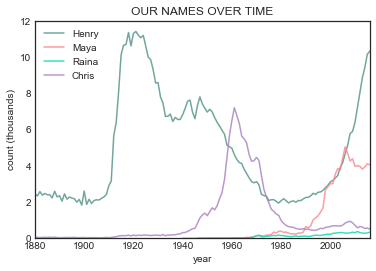

In [109]:
# Plot my wife and I along with the kids
family = ['Henry', 'Maya', 'Raina', 'Chris']
plot_trends(family, ['M','F','F','M'], ['xkcd:dusty teal', 'xkcd:blush pink', 'xkcd:aquamarine', 'xkcd:wisteria'], title='OUR NAMES OVER TIME')

C:\Users\echri\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


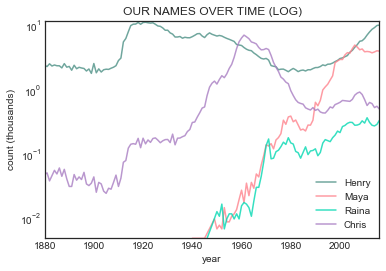

In [110]:
# Plot our family names on a log scale
plot_trends(family, ['M','F','F','M'], ['xkcd:dusty teal', 'xkcd:blush pink', 'xkcd:aquamarine', 'xkcd:wisteria'], title='OUR NAMES OVER TIME (LOG)', scale='log')

After converting to a logarithmic scale we can better see the change in name popularity over time.  We see that although Raina still remains a relatively obscure name, Maya appears much closer to Henry and Chris.  It is fascinating to me that both Raina ***and*** Maya don't seem to appear in the US until World War II. 


Just out of curiosity, let's see if there are any trends in the number of people who were too tired to give their baby a name.  Anybody who has gone throw 19+ hours of labor knows what I'm talking about.  I was exhausted and all I had to do was support the real work that my wife was doing. Honestly, I'm surprised we don't see any "Who Cares" on the list.  But we do see "Unknown," so we'll take a look at that.

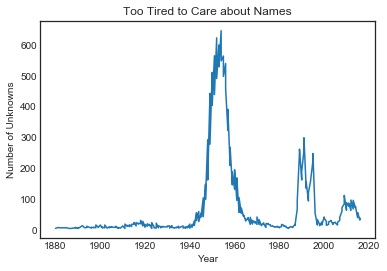

In [111]:
# Create dataframe of babies names 'Unknown'
unknown = babynames[babynames.Name == 'Unknown']

# Plot the Unknowns
_ = plt.plot(unknown['Year'], unknown['Count'])
_ = plt.ylabel('Number of Unknowns')
_ = plt.xlabel('Year')
_ = plt.title('Too Tired to Care about Names')
plt.show()

In [112]:
# Determine the number of male and female Unknown
male_unknown = unknown[unknown.Sex == 'M']
female_unknown = unknown[unknown.Sex == 'F']

print("There are", male_unknown.Count.sum(), "male Unknowns and", female_unknown.Count.sum(), "female Unknowns.")
print(unknown[unknown.Count == unknown.Count.max()])

There are 9241 male Unknowns and 9370 female Unknowns.
     Year     Name Sex  Count  Total Births by Year  Total by Year and Sex  \
334  1954  Unknown   F    646               3912401                1874002   

     Pct of Total  Pct by Sex  
334      0.016512    0.034472  


Wow, what was going on in the 1950s?  I know this is the baby boomer generation.  Was there just so much post-war fucking that they ran out of ideas for names?  "Let's see, we already have Henry, Harold, Michael, Jacob, Thomas, Lily, Emily, Anna, and Claire.  Meh, Unknown.  We'll figure it out." If anyone knows and Unknown, let me know.  I really want to know how things turned out.  

In [66]:
# Generate female Life Tables from SSA data
life_table = pd.read_csv('datasets/babynames/LifeTables_F_2017.csv', header=4)
life_table['Sex'] = 'F'
life_table.head()

,Year,x,q(x),l(x),d(x),L(x),T(x),e(x),D(x),M(x),A(x),N(x),a(x),12a(x),Sex
0,1900,0,0.119694,100000,11969,92047,4895677,48.96,100000,37339,0.3734,2383444,23.8344,280.51,F
1,1900,1,0.036174,88031,3184,86438,4803630,54.57,85716,25684,0.2996,2283444,26.6396,314.17,F
2,1900,2,0.017817,84846,1512,84090,4717192,55.60,80444,22665,0.2817,2197728,27.3201,322.34,F
3,1900,3,0.012922,83334,1077,82796,4633101,55.60,76933,21269,0.2765,2117284,27.5211,324.75,F
4,1900,4,0.010310,82258,848,81834,4550305,55.32,73943,20301,0.2746,2040351,27.5937,325.62,F


In [67]:
# Combine the male and female data
combo_life_table = life_table.append(life_table_male).reset_index(drop=True)

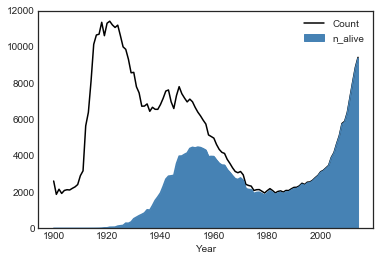

In [75]:
# Create a plot to show the estimated number of Henrys still alive from each year
fig, ax = plt.subplots()
henry_alive.plot(x = 'Year', y = 'Count', ax = ax, color = 'black')
henry_alive.plot.area(x = 'Year', y = 'n_alive', ax=ax, color = "steelblue")
plt.show()